# Dimensionality reduction via PCA with missing data to classify tumours

In [4]:
import os
os.chdir("../")

In [5]:
import numpy as np
from spalor.datasets import load_STT
from scipy import sparse

STTm=load_STT()
data_matrix=STTm.T.to_numpy()

/Users/aprilsagan/Documents/spalor/spalor/datasets/STTm.pkl


In [6]:
sA = sparse.coo_matrix(data_matrix)
X=np.array([sA.row,sA.col])
y=np.array(sA.data)

print(X)

[[   0    0    0 ...   30   30   30]
 [   0    1    2 ... 5517 5518 5519]]


In [7]:
data_matrix.shape

(31, 5520)

In [8]:
(num_samples,num_genes)=data_matrix.shape
print("Number of samples: ", num_samples)
print("Number of genes: ", num_genes)

Number of samples:  31
Number of genes:  5520


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.transpose(), y, test_size=0.6, random_state=42)
print("Proportion of measurements available: ",len(y_train)/len(y))

Proportion of measurements available:  0.39999532456299275


In [10]:
from spalor.models import MC
mc=MC(5)
mc.fit(X_train, y=y_train)

y_predict=mc.predict(X_test.T)

SyntaxError: invalid syntax (mc.py, line 69)

In [ ]:
mc.user_means

In [ ]:
from spalor.algorithms.mc_algorithms import *

(U,V)=lmafit(31, 5520, 5,X_train.T ,y_train)

In [ ]:
x1=np.random.randn(40,3)
x2=np.random.randn(20,3)

In [ ]:
mc.rank

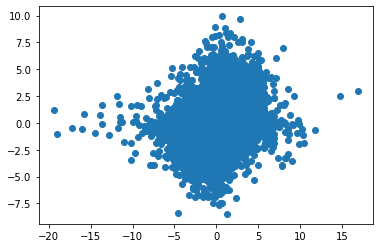

r squared value:  0.350177203077899


In [10]:
import matplotlib.pyplot as plt
import scipy.stats
plt.scatter(y_predict, y_test)
plt.show()

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y_predict,y_test)

print("r squared value: ",r_value)

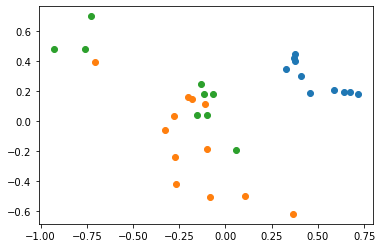

In [11]:
pc1=mc.U[:,0]
pc2=mc.U[:,1]

plt.scatter(pc1[0:10],pc2[0:10])
plt.scatter(pc1[10:22],pc2[10:22])
plt.scatter(pc1[22:31],pc2[22:31])

plt.show()